Note: this analysis is for 13/50-1 (13/72-73 -- after expanding to 0.3 nm)

TODO: requires 20 GB memory, make it more memory efficient?

## Get states for each work trajectory for A59R

In [1]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    new_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_new.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_new.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[0])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), new_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    traj = md.Trajectory(np.array(all_pos_reverse), new_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [3]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/90/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [4]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [5]:
dihedral_atoms = [['N', 'CA', 'CB', 'HB1'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [6]:
indices_old

[835, 836, 839, 844]

In [7]:
indices_new

[835, 836, 839, 844]

In [8]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:20<00:00,  4.90it/s]

new files found: 100


#### Get dihedrals for complex

In [9]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/90/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [10]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [11]:
dihedral_atoms = [['N', 'CA', 'CB', 'HB1'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [12]:
indices_old

[835, 836, 839, 844]

In [13]:
indices_new

[835, 836, 839, 844]

In [14]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (CH3) of chain 0 residue 0 (ACE)>
<Atom 1 (C) of chain 0 residue 0 (ACE)>
<Atom 2 (O) of chain 0 residue 0 (ACE)>
<Atom 3 (H1) of chain 0 residue 0 (ACE)>
<Atom 4 (H2) of chain 0 residue 0 (ACE)>
<Atom 5 (H3) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (VAL)>
<Atom 7 (CA) of chain 0 residue 1 (VAL)>
<Atom 8 (C) of chain 0 residue 1 (VAL)>
<Atom 9 (O) of chain 0 residue 1 (VAL)>
<Atom 10 (CB) of chain 0 residue 1 (VAL)>
<Atom 11 (CG1) of chain 0 residue 1 (VAL)>
<Atom 12 (CG2) of chain 0 residue 1 (VAL)>
<Atom 13 (H) of chain 0 residue 1 (VAL)>
<Atom 14 (HA) of chain 0 residue 1 (VAL)>
<Atom 15 (HB) of chain 0 residue 1 (VAL)>
<Atom 16 (HG11) of chain 0 residue 1 (VAL)>
<Atom 17 (HG12) of chain 0 residue 1 (VAL)>
<Atom 18 (HG13) of chain 0 residue 1 (VAL)>
<Atom 19 (HG21) of chain 0 residue 1 (VAL)>
<Atom 20 (HG22) of chain 0 residue 1 (VAL)>
<Atom 21 (HG23) of chain 0 residue 1 (VAL)>
<Atom 22 (N) of chain 0 residue 2 (ILE)>
<Atom 23 (CA) of chain 0 residue 2 (

<Atom 4197 (O) of chain 3 residue 550 (HOH)>
<Atom 4198 (H1) of chain 3 residue 550 (HOH)>
<Atom 4199 (H2) of chain 3 residue 550 (HOH)>
<Atom 4200 (O) of chain 3 residue 551 (HOH)>
<Atom 4201 (H1) of chain 3 residue 551 (HOH)>
<Atom 4202 (H2) of chain 3 residue 551 (HOH)>
<Atom 4203 (O) of chain 3 residue 552 (HOH)>
<Atom 4204 (H1) of chain 3 residue 552 (HOH)>
<Atom 4205 (H2) of chain 3 residue 552 (HOH)>
<Atom 4206 (O) of chain 3 residue 553 (HOH)>
<Atom 4207 (H1) of chain 3 residue 553 (HOH)>
<Atom 4208 (H2) of chain 3 residue 553 (HOH)>
<Atom 4209 (O) of chain 3 residue 554 (HOH)>
<Atom 4210 (H1) of chain 3 residue 554 (HOH)>
<Atom 4211 (H2) of chain 3 residue 554 (HOH)>
<Atom 4212 (O) of chain 3 residue 555 (HOH)>
<Atom 4213 (H1) of chain 3 residue 555 (HOH)>
<Atom 4214 (H2) of chain 3 residue 555 (HOH)>
<Atom 4215 (O) of chain 3 residue 556 (HOH)>
<Atom 4216 (H1) of chain 3 residue 556 (HOH)>
<Atom 4217 (H2) of chain 3 residue 556 (HOH)>
<Atom 4218 (O) of chain 3 residue 557 (HO

<Atom 9696 (O) of chain 3 residue 2383 (HOH)>
<Atom 9697 (H1) of chain 3 residue 2383 (HOH)>
<Atom 9698 (H2) of chain 3 residue 2383 (HOH)>
<Atom 9699 (O) of chain 3 residue 2384 (HOH)>
<Atom 9700 (H1) of chain 3 residue 2384 (HOH)>
<Atom 9701 (H2) of chain 3 residue 2384 (HOH)>
<Atom 9702 (O) of chain 3 residue 2385 (HOH)>
<Atom 9703 (H1) of chain 3 residue 2385 (HOH)>
<Atom 9704 (H2) of chain 3 residue 2385 (HOH)>
<Atom 9705 (O) of chain 3 residue 2386 (HOH)>
<Atom 9706 (H1) of chain 3 residue 2386 (HOH)>
<Atom 9707 (H2) of chain 3 residue 2386 (HOH)>
<Atom 9708 (O) of chain 3 residue 2387 (HOH)>
<Atom 9709 (H1) of chain 3 residue 2387 (HOH)>
<Atom 9710 (H2) of chain 3 residue 2387 (HOH)>
<Atom 9711 (O) of chain 3 residue 2388 (HOH)>
<Atom 9712 (H1) of chain 3 residue 2388 (HOH)>
<Atom 9713 (H2) of chain 3 residue 2388 (HOH)>
<Atom 9714 (O) of chain 3 residue 2389 (HOH)>
<Atom 9715 (H1) of chain 3 residue 2389 (HOH)>
<Atom 9716 (H2) of chain 3 residue 2389 (HOH)>
<Atom 9717 (O) of ch

<Atom 14696 (H2) of chain 3 residue 4049 (HOH)>
<Atom 14697 (O) of chain 3 residue 4050 (HOH)>
<Atom 14698 (H1) of chain 3 residue 4050 (HOH)>
<Atom 14699 (H2) of chain 3 residue 4050 (HOH)>
<Atom 14700 (O) of chain 3 residue 4051 (HOH)>
<Atom 14701 (H1) of chain 3 residue 4051 (HOH)>
<Atom 14702 (H2) of chain 3 residue 4051 (HOH)>
<Atom 14703 (O) of chain 3 residue 4052 (HOH)>
<Atom 14704 (H1) of chain 3 residue 4052 (HOH)>
<Atom 14705 (H2) of chain 3 residue 4052 (HOH)>
<Atom 14706 (O) of chain 3 residue 4053 (HOH)>
<Atom 14707 (H1) of chain 3 residue 4053 (HOH)>
<Atom 14708 (H2) of chain 3 residue 4053 (HOH)>
<Atom 14709 (O) of chain 3 residue 4054 (HOH)>
<Atom 14710 (H1) of chain 3 residue 4054 (HOH)>
<Atom 14711 (H2) of chain 3 residue 4054 (HOH)>
<Atom 14712 (O) of chain 3 residue 4055 (HOH)>
<Atom 14713 (H1) of chain 3 residue 4055 (HOH)>
<Atom 14714 (H2) of chain 3 residue 4055 (HOH)>
<Atom 14715 (O) of chain 3 residue 4056 (HOH)>
<Atom 14716 (H1) of chain 3 residue 4056 (HOH)>

<Atom 20195 (H2) of chain 3 residue 5882 (HOH)>
<Atom 20196 (O) of chain 3 residue 5883 (HOH)>
<Atom 20197 (H1) of chain 3 residue 5883 (HOH)>
<Atom 20198 (H2) of chain 3 residue 5883 (HOH)>
<Atom 20199 (O) of chain 3 residue 5884 (HOH)>
<Atom 20200 (H1) of chain 3 residue 5884 (HOH)>
<Atom 20201 (H2) of chain 3 residue 5884 (HOH)>
<Atom 20202 (O) of chain 3 residue 5885 (HOH)>
<Atom 20203 (H1) of chain 3 residue 5885 (HOH)>
<Atom 20204 (H2) of chain 3 residue 5885 (HOH)>
<Atom 20205 (O) of chain 3 residue 5886 (HOH)>
<Atom 20206 (H1) of chain 3 residue 5886 (HOH)>
<Atom 20207 (H2) of chain 3 residue 5886 (HOH)>
<Atom 20208 (O) of chain 3 residue 5887 (HOH)>
<Atom 20209 (H1) of chain 3 residue 5887 (HOH)>
<Atom 20210 (H2) of chain 3 residue 5887 (HOH)>
<Atom 20211 (O) of chain 3 residue 5888 (HOH)>
<Atom 20212 (H1) of chain 3 residue 5888 (HOH)>
<Atom 20213 (H2) of chain 3 residue 5888 (HOH)>
<Atom 20214 (O) of chain 3 residue 5889 (HOH)>
<Atom 20215 (H1) of chain 3 residue 5889 (HOH)>

<Atom 26195 (H2) of chain 3 residue 7882 (HOH)>
<Atom 26196 (O) of chain 3 residue 7883 (HOH)>
<Atom 26197 (H1) of chain 3 residue 7883 (HOH)>
<Atom 26198 (H2) of chain 3 residue 7883 (HOH)>
<Atom 26199 (O) of chain 3 residue 7884 (HOH)>
<Atom 26200 (H1) of chain 3 residue 7884 (HOH)>
<Atom 26201 (H2) of chain 3 residue 7884 (HOH)>
<Atom 26202 (O) of chain 3 residue 7885 (HOH)>
<Atom 26203 (H1) of chain 3 residue 7885 (HOH)>
<Atom 26204 (H2) of chain 3 residue 7885 (HOH)>
<Atom 26205 (O) of chain 3 residue 7886 (HOH)>
<Atom 26206 (H1) of chain 3 residue 7886 (HOH)>
<Atom 26207 (H2) of chain 3 residue 7886 (HOH)>
<Atom 26208 (O) of chain 3 residue 7887 (HOH)>
<Atom 26209 (H1) of chain 3 residue 7887 (HOH)>
<Atom 26210 (H2) of chain 3 residue 7887 (HOH)>
<Atom 26211 (O) of chain 3 residue 7888 (HOH)>
<Atom 26212 (H1) of chain 3 residue 7888 (HOH)>
<Atom 26213 (H2) of chain 3 residue 7888 (HOH)>
<Atom 26214 (O) of chain 3 residue 7889 (HOH)>
<Atom 26215 (H1) of chain 3 residue 7889 (HOH)>

In [15]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


new files found: 100


In [16]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [17]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [18]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

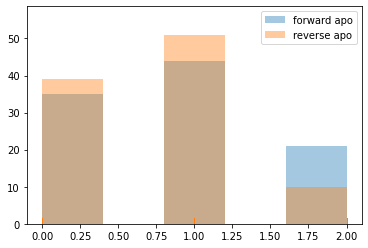

In [19]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

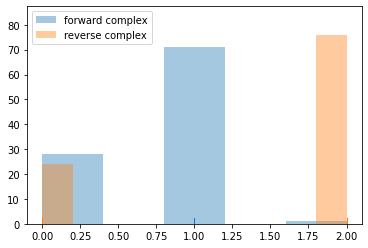

In [20]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on A59R

In [21]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [22]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [23]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["A42T"]
d_results = {}
d_phases = {}
first = 90
for i in tqdm_notebook([90]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 90
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

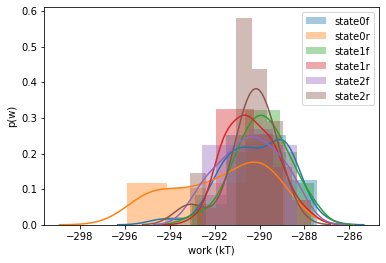

In [24]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

    # Plot work distributions
    for i in [0,1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

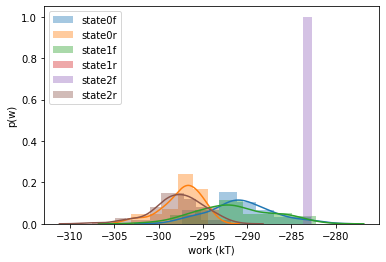

In [25]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [26]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [27]:
import tqdm
states_apo = [0, 1, 2]
states_complex = [0]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:17<00:00, 128.44it/s]


In [28]:
dgs_state_all_A42T = dgs_state_all

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

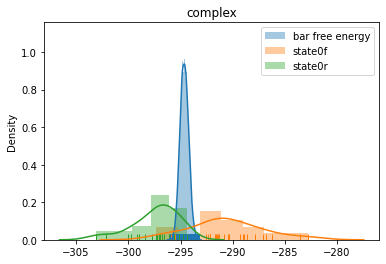

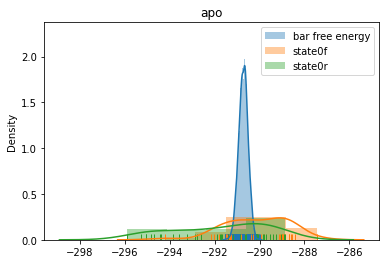

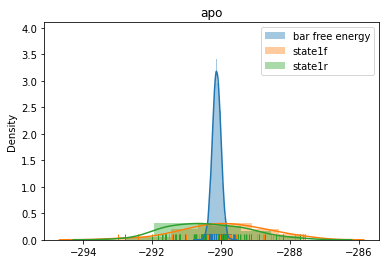

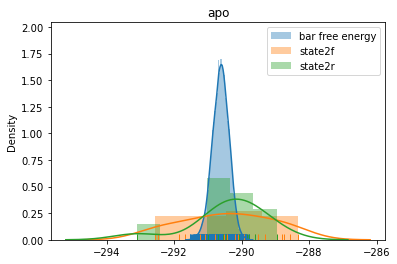

In [29]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

## Get states for each work trajectory for R59A

In [30]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [31]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [32]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/89/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [33]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [34]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'],  ['N', 'CA', 'CB', 'HB1']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [35]:
indices_old

[835, 836, 839, 840]

In [36]:
indices_new

[835, 836, 839, 844]

In [37]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]

new files found: 100


#### Get dihedrals for complex

In [38]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/89/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [39]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [40]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'],  ['N', 'CA', 'CB', 'HB1']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '59' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [41]:
indices_old

[835, 836, 839, 840]

In [42]:
indices_new

[835, 836, 839, 844]

In [43]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


new files found: 100


In [44]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [45]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [46]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

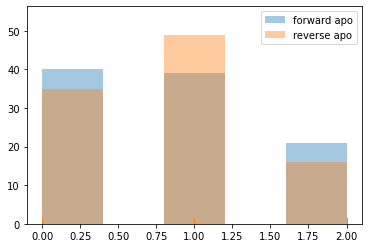

In [47]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

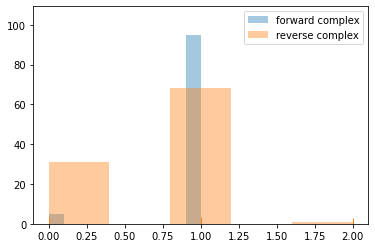

In [48]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

In [49]:
for atom in htf.hybrid_topology.atoms:
    print(atom, atom.index)

ACE2-CH3 0
ACE2-C 1
ACE2-O 2
ACE2-H1 3
ACE2-H2 4
ACE2-H3 5
VAL3-N 6
VAL3-CA 7
VAL3-C 8
VAL3-O 9
VAL3-CB 10
VAL3-CG1 11
VAL3-CG2 12
VAL3-H 13
VAL3-HA 14
VAL3-HB 15
VAL3-HG11 16
VAL3-HG12 17
VAL3-HG13 18
VAL3-HG21 19
VAL3-HG22 20
VAL3-HG23 21
ILE4-N 22
ILE4-CA 23
ILE4-C 24
ILE4-O 25
ILE4-CB 26
ILE4-CG1 27
ILE4-CG2 28
ILE4-CD1 29
ILE4-H 30
ILE4-HA 31
ILE4-HB 32
ILE4-HG13 33
ILE4-HG12 34
ILE4-HG21 35
ILE4-HG22 36
ILE4-HG23 37
ILE4-HD11 38
ILE4-HD12 39
ILE4-HD13 40
ASN5-N 41
ASN5-CA 42
ASN5-C 43
ASN5-O 44
ASN5-CB 45
ASN5-CG 46
ASN5-OD1 47
ASN5-ND2 48
ASN5-H 49
ASN5-HA 50
ASN5-HB2 51
ASN5-HB3 52
ASN5-HD21 53
ASN5-HD22 54
THR6-N 55
THR6-CA 56
THR6-C 57
THR6-O 58
THR6-CB 59
THR6-OG1 60
THR6-CG2 61
THR6-H 62
THR6-HA 63
THR6-HB 64
THR6-HG1 65
THR6-HG21 66
THR6-HG22 67
THR6-HG23 68
PHE7-N 69
PHE7-CA 70
PHE7-C 71
PHE7-O 72
PHE7-CB 73
PHE7-CG 74
PHE7-CD1 75
PHE7-CD2 76
PHE7-CE1 77
PHE7-CE2 78
PHE7-CZ 79
PHE7-H 80
PHE7-HA 81
PHE7-HB3 82
PHE7-HB2 83
PHE7-HD1 84
PHE7-HD2 85
PHE7-HE1 86
PHE7-HE2 87
PHE

TYR103-HD2 1569
TYR103-HE1 1570
TYR103-HE2 1571
TYR103-HH 1572
GLN104-N 1573
GLN104-CA 1574
GLN104-C 1575
GLN104-O 1576
GLN104-CB 1577
GLN104-CG 1578
GLN104-CD 1579
GLN104-OE1 1580
GLN104-NE2 1581
GLN104-H 1582
GLN104-HA 1583
GLN104-HB3 1584
GLN104-HB2 1585
GLN104-HG3 1586
GLN104-HG2 1587
GLN104-HE21 1588
GLN104-HE22 1589
THR105-N 1590
THR105-CA 1591
THR105-C 1592
THR105-O 1593
THR105-CB 1594
THR105-OG1 1595
THR105-CG2 1596
THR105-H 1597
THR105-HA 1598
THR105-HB 1599
THR105-HG1 1600
THR105-HG21 1601
THR105-HG22 1602
THR105-HG23 1603
PHE106-N 1604
PHE106-CA 1605
PHE106-C 1606
PHE106-O 1607
PHE106-CB 1608
PHE106-CG 1609
PHE106-CD1 1610
PHE106-CD2 1611
PHE106-CE1 1612
PHE106-CE2 1613
PHE106-CZ 1614
PHE106-H 1615
PHE106-HA 1616
PHE106-HB3 1617
PHE106-HB2 1618
PHE106-HD1 1619
PHE106-HD2 1620
PHE106-HE1 1621
PHE106-HE2 1622
PHE106-HZ 1623
THR107-N 1624
THR107-CA 1625
THR107-C 1626
THR107-O 1627
THR107-CB 1628
THR107-OG1 1629
THR107-CG2 1630
THR107-H 1631
THR107-HA 1632
THR107-HB 1633
THR107-

ILE84-CD1 3068
ILE84-H 3069
ILE84-HA 3070
ILE84-HB 3071
ILE84-HG13 3072
ILE84-HG12 3073
ILE84-HG21 3074
ILE84-HG22 3075
ILE84-HG23 3076
ILE84-HD11 3077
ILE84-HD12 3078
ILE84-HD13 3079
THR85-N 3080
THR85-CA 3081
THR85-C 3082
THR85-O 3083
THR85-CB 3084
THR85-OG1 3085
THR85-CG2 3086
THR85-H 3087
THR85-HA 3088
THR85-HB 3089
THR85-HG1 3090
THR85-HG21 3091
THR85-HG22 3092
THR85-HG23 3093
ILE86-N 3094
ILE86-CA 3095
ILE86-C 3096
ILE86-O 3097
ILE86-CB 3098
ILE86-CG1 3099
ILE86-CG2 3100
ILE86-CD1 3101
ILE86-H 3102
ILE86-HA 3103
ILE86-HB 3104
ILE86-HG13 3105
ILE86-HG12 3106
ILE86-HG21 3107
ILE86-HG22 3108
ILE86-HG23 3109
ILE86-HD11 3110
ILE86-HD12 3111
ILE86-HD13 3112
ILE87-N 3113
ILE87-CA 3114
ILE87-C 3115
ILE87-O 3116
ILE87-CB 3117
ILE87-CG1 3118
ILE87-CG2 3119
ILE87-CD1 3120
ILE87-H 3121
ILE87-HA 3122
ILE87-HB 3123
ILE87-HG13 3124
ILE87-HG12 3125
ILE87-HG21 3126
ILE87-HG22 3127
ILE87-HG23 3128
ILE87-HD11 3129
ILE87-HD12 3130
ILE87-HD13 3131
LEU88-N 3132
LEU88-CA 3133
LEU88-C 3134
LEU88-O 3135


HOH675-H2 4568
HOH676-O 4569
HOH676-H1 4570
HOH676-H2 4571
HOH677-O 4572
HOH677-H1 4573
HOH677-H2 4574
HOH678-O 4575
HOH678-H1 4576
HOH678-H2 4577
HOH679-O 4578
HOH679-H1 4579
HOH679-H2 4580
HOH680-O 4581
HOH680-H1 4582
HOH680-H2 4583
HOH681-O 4584
HOH681-H1 4585
HOH681-H2 4586
HOH682-O 4587
HOH682-H1 4588
HOH682-H2 4589
HOH683-O 4590
HOH683-H1 4591
HOH683-H2 4592
HOH684-O 4593
HOH684-H1 4594
HOH684-H2 4595
HOH685-O 4596
HOH685-H1 4597
HOH685-H2 4598
HOH686-O 4599
HOH686-H1 4600
HOH686-H2 4601
HOH687-O 4602
HOH687-H1 4603
HOH687-H2 4604
HOH688-O 4605
HOH688-H1 4606
HOH688-H2 4607
HOH689-O 4608
HOH689-H1 4609
HOH689-H2 4610
HOH690-O 4611
HOH690-H1 4612
HOH690-H2 4613
HOH691-O 4614
HOH691-H1 4615
HOH691-H2 4616
HOH692-O 4617
HOH692-H1 4618
HOH692-H2 4619
HOH693-O 4620
HOH693-H1 4621
HOH693-H2 4622
HOH694-O 4623
HOH694-H1 4624
HOH694-H2 4625
HOH695-O 4626
HOH695-H1 4627
HOH695-H2 4628
HOH696-O 4629
HOH696-H1 4630
HOH696-H2 4631
HOH697-O 4632
HOH697-H1 4633
HOH697-H2 4634
HOH698-O 4635
HOH

HOH1177-H2 6068
HOH1178-O 6069
HOH1178-H1 6070
HOH1178-H2 6071
HOH1179-O 6072
HOH1179-H1 6073
HOH1179-H2 6074
HOH1180-O 6075
HOH1180-H1 6076
HOH1180-H2 6077
HOH1181-O 6078
HOH1181-H1 6079
HOH1181-H2 6080
HOH1182-O 6081
HOH1182-H1 6082
HOH1182-H2 6083
HOH1183-O 6084
HOH1183-H1 6085
HOH1183-H2 6086
HOH1184-O 6087
HOH1184-H1 6088
HOH1184-H2 6089
HOH1185-O 6090
HOH1185-H1 6091
HOH1185-H2 6092
HOH1186-O 6093
HOH1186-H1 6094
HOH1186-H2 6095
HOH1187-O 6096
HOH1187-H1 6097
HOH1187-H2 6098
HOH1188-O 6099
HOH1188-H1 6100
HOH1188-H2 6101
HOH1189-O 6102
HOH1189-H1 6103
HOH1189-H2 6104
HOH1190-O 6105
HOH1190-H1 6106
HOH1190-H2 6107
HOH1191-O 6108
HOH1191-H1 6109
HOH1191-H2 6110
HOH1192-O 6111
HOH1192-H1 6112
HOH1192-H2 6113
HOH1193-O 6114
HOH1193-H1 6115
HOH1193-H2 6116
HOH1194-O 6117
HOH1194-H1 6118
HOH1194-H2 6119
HOH1195-O 6120
HOH1195-H1 6121
HOH1195-H2 6122
HOH1196-O 6123
HOH1196-H1 6124
HOH1196-H2 6125
HOH1197-O 6126
HOH1197-H1 6127
HOH1197-H2 6128
HOH1198-O 6129
HOH1198-H1 6130
HOH1198-H2 61

HOH1677-H2 7568
HOH1678-O 7569
HOH1678-H1 7570
HOH1678-H2 7571
HOH1679-O 7572
HOH1679-H1 7573
HOH1679-H2 7574
HOH1680-O 7575
HOH1680-H1 7576
HOH1680-H2 7577
HOH1681-O 7578
HOH1681-H1 7579
HOH1681-H2 7580
HOH1682-O 7581
HOH1682-H1 7582
HOH1682-H2 7583
HOH1683-O 7584
HOH1683-H1 7585
HOH1683-H2 7586
HOH1684-O 7587
HOH1684-H1 7588
HOH1684-H2 7589
HOH1685-O 7590
HOH1685-H1 7591
HOH1685-H2 7592
HOH1686-O 7593
HOH1686-H1 7594
HOH1686-H2 7595
HOH1687-O 7596
HOH1687-H1 7597
HOH1687-H2 7598
HOH1688-O 7599
HOH1688-H1 7600
HOH1688-H2 7601
HOH1689-O 7602
HOH1689-H1 7603
HOH1689-H2 7604
HOH1690-O 7605
HOH1690-H1 7606
HOH1690-H2 7607
HOH1691-O 7608
HOH1691-H1 7609
HOH1691-H2 7610
HOH1692-O 7611
HOH1692-H1 7612
HOH1692-H2 7613
HOH1693-O 7614
HOH1693-H1 7615
HOH1693-H2 7616
HOH1694-O 7617
HOH1694-H1 7618
HOH1694-H2 7619
HOH1695-O 7620
HOH1695-H1 7621
HOH1695-H2 7622
HOH1696-O 7623
HOH1696-H1 7624
HOH1696-H2 7625
HOH1697-O 7626
HOH1697-H1 7627
HOH1697-H2 7628
HOH1698-O 7629
HOH1698-H1 7630
HOH1698-H2 76

HOH2179-H1 9067
HOH2179-H2 9068
HOH2180-O 9069
HOH2180-H1 9070
HOH2180-H2 9071
HOH2181-O 9072
HOH2181-H1 9073
HOH2181-H2 9074
HOH2182-O 9075
HOH2182-H1 9076
HOH2182-H2 9077
HOH2183-O 9078
HOH2183-H1 9079
HOH2183-H2 9080
HOH2184-O 9081
HOH2184-H1 9082
HOH2184-H2 9083
HOH2185-O 9084
HOH2185-H1 9085
HOH2185-H2 9086
HOH2186-O 9087
HOH2186-H1 9088
HOH2186-H2 9089
HOH2187-O 9090
HOH2187-H1 9091
HOH2187-H2 9092
HOH2188-O 9093
HOH2188-H1 9094
HOH2188-H2 9095
HOH2189-O 9096
HOH2189-H1 9097
HOH2189-H2 9098
HOH2190-O 9099
HOH2190-H1 9100
HOH2190-H2 9101
HOH2191-O 9102
HOH2191-H1 9103
HOH2191-H2 9104
HOH2192-O 9105
HOH2192-H1 9106
HOH2192-H2 9107
HOH2193-O 9108
HOH2193-H1 9109
HOH2193-H2 9110
HOH2194-O 9111
HOH2194-H1 9112
HOH2194-H2 9113
HOH2195-O 9114
HOH2195-H1 9115
HOH2195-H2 9116
HOH2196-O 9117
HOH2196-H1 9118
HOH2196-H2 9119
HOH2197-O 9120
HOH2197-H1 9121
HOH2197-H2 9122
HOH2198-O 9123
HOH2198-H1 9124
HOH2198-H2 9125
HOH2199-O 9126
HOH2199-H1 9127
HOH2199-H2 9128
HOH2200-O 9129
HOH2200-H1 91

HOH2680-H1 10567
HOH2680-H2 10568
HOH2681-O 10569
HOH2681-H1 10570
HOH2681-H2 10571
HOH2682-O 10572
HOH2682-H1 10573
HOH2682-H2 10574
HOH2683-O 10575
HOH2683-H1 10576
HOH2683-H2 10577
HOH2684-O 10578
HOH2684-H1 10579
HOH2684-H2 10580
HOH2685-O 10581
HOH2685-H1 10582
HOH2685-H2 10583
HOH2686-O 10584
HOH2686-H1 10585
HOH2686-H2 10586
HOH2687-O 10587
HOH2687-H1 10588
HOH2687-H2 10589
HOH2688-O 10590
HOH2688-H1 10591
HOH2688-H2 10592
HOH2689-O 10593
HOH2689-H1 10594
HOH2689-H2 10595
HOH2690-O 10596
HOH2690-H1 10597
HOH2690-H2 10598
HOH2691-O 10599
HOH2691-H1 10600
HOH2691-H2 10601
HOH2692-O 10602
HOH2692-H1 10603
HOH2692-H2 10604
HOH2693-O 10605
HOH2693-H1 10606
HOH2693-H2 10607
HOH2694-O 10608
HOH2694-H1 10609
HOH2694-H2 10610
HOH2695-O 10611
HOH2695-H1 10612
HOH2695-H2 10613
HOH2696-O 10614
HOH2696-H1 10615
HOH2696-H2 10616
HOH2697-O 10617
HOH2697-H1 10618
HOH2697-H2 10619
HOH2698-O 10620
HOH2698-H1 10621
HOH2698-H2 10622
HOH2699-O 10623
HOH2699-H1 10624
HOH2699-H2 10625
HOH2700-O 10626


HOH3180-H1 12067
HOH3180-H2 12068
HOH3181-O 12069
HOH3181-H1 12070
HOH3181-H2 12071
HOH3182-O 12072
HOH3182-H1 12073
HOH3182-H2 12074
HOH3183-O 12075
HOH3183-H1 12076
HOH3183-H2 12077
HOH3184-O 12078
HOH3184-H1 12079
HOH3184-H2 12080
HOH3185-O 12081
HOH3185-H1 12082
HOH3185-H2 12083
HOH3186-O 12084
HOH3186-H1 12085
HOH3186-H2 12086
HOH3187-O 12087
HOH3187-H1 12088
HOH3187-H2 12089
HOH3188-O 12090
HOH3188-H1 12091
HOH3188-H2 12092
HOH3189-O 12093
HOH3189-H1 12094
HOH3189-H2 12095
HOH3190-O 12096
HOH3190-H1 12097
HOH3190-H2 12098
HOH3191-O 12099
HOH3191-H1 12100
HOH3191-H2 12101
HOH3192-O 12102
HOH3192-H1 12103
HOH3192-H2 12104
HOH3193-O 12105
HOH3193-H1 12106
HOH3193-H2 12107
HOH3194-O 12108
HOH3194-H1 12109
HOH3194-H2 12110
HOH3195-O 12111
HOH3195-H1 12112
HOH3195-H2 12113
HOH3196-O 12114
HOH3196-H1 12115
HOH3196-H2 12116
HOH3197-O 12117
HOH3197-H1 12118
HOH3197-H2 12119
HOH3198-O 12120
HOH3198-H1 12121
HOH3198-H2 12122
HOH3199-O 12123
HOH3199-H1 12124
HOH3199-H2 12125
HOH3200-O 12126


HOH3764-H2 13817
HOH3765-O 13818
HOH3765-H1 13819
HOH3765-H2 13820
HOH3766-O 13821
HOH3766-H1 13822
HOH3766-H2 13823
HOH3767-O 13824
HOH3767-H1 13825
HOH3767-H2 13826
HOH3768-O 13827
HOH3768-H1 13828
HOH3768-H2 13829
HOH3769-O 13830
HOH3769-H1 13831
HOH3769-H2 13832
HOH3770-O 13833
HOH3770-H1 13834
HOH3770-H2 13835
HOH3771-O 13836
HOH3771-H1 13837
HOH3771-H2 13838
HOH3772-O 13839
HOH3772-H1 13840
HOH3772-H2 13841
HOH3773-O 13842
HOH3773-H1 13843
HOH3773-H2 13844
HOH3774-O 13845
HOH3774-H1 13846
HOH3774-H2 13847
HOH3775-O 13848
HOH3775-H1 13849
HOH3775-H2 13850
HOH3777-O 13851
HOH3777-H1 13852
HOH3777-H2 13853
HOH3778-O 13854
HOH3778-H1 13855
HOH3778-H2 13856
HOH3779-O 13857
HOH3779-H1 13858
HOH3779-H2 13859
HOH3780-O 13860
HOH3780-H1 13861
HOH3780-H2 13862
HOH3781-O 13863
HOH3781-H1 13864
HOH3781-H2 13865
HOH3782-O 13866
HOH3782-H1 13867
HOH3782-H2 13868
HOH3783-O 13869
HOH3783-H1 13870
HOH3783-H2 13871
HOH3784-O 13872
HOH3784-H1 13873
HOH3784-H2 13874
HOH3785-O 13875
HOH3785-H1 13876


HOH4265-H1 15316
HOH4265-H2 15317
HOH4266-O 15318
HOH4266-H1 15319
HOH4266-H2 15320
HOH4267-O 15321
HOH4267-H1 15322
HOH4267-H2 15323
HOH4268-O 15324
HOH4268-H1 15325
HOH4268-H2 15326
HOH4269-O 15327
HOH4269-H1 15328
HOH4269-H2 15329
HOH4270-O 15330
HOH4270-H1 15331
HOH4270-H2 15332
HOH4271-O 15333
HOH4271-H1 15334
HOH4271-H2 15335
HOH4272-O 15336
HOH4272-H1 15337
HOH4272-H2 15338
HOH4273-O 15339
HOH4273-H1 15340
HOH4273-H2 15341
HOH4274-O 15342
HOH4274-H1 15343
HOH4274-H2 15344
HOH4275-O 15345
HOH4275-H1 15346
HOH4275-H2 15347
HOH4276-O 15348
HOH4276-H1 15349
HOH4276-H2 15350
HOH4277-O 15351
HOH4277-H1 15352
HOH4277-H2 15353
HOH4278-O 15354
HOH4278-H1 15355
HOH4278-H2 15356
HOH4279-O 15357
HOH4279-H1 15358
HOH4279-H2 15359
HOH4280-O 15360
HOH4280-H1 15361
HOH4280-H2 15362
HOH4281-O 15363
HOH4281-H1 15364
HOH4281-H2 15365
HOH4282-O 15366
HOH4282-H1 15367
HOH4282-H2 15368
HOH4283-O 15369
HOH4283-H1 15370
HOH4283-H2 15371
HOH4284-O 15372
HOH4284-H1 15373
HOH4284-H2 15374
HOH4285-O 15375


HOH4766-H1 16816
HOH4766-H2 16817
HOH4767-O 16818
HOH4767-H1 16819
HOH4767-H2 16820
HOH4768-O 16821
HOH4768-H1 16822
HOH4768-H2 16823
HOH4769-O 16824
HOH4769-H1 16825
HOH4769-H2 16826
HOH4770-O 16827
HOH4770-H1 16828
HOH4770-H2 16829
HOH4771-O 16830
HOH4771-H1 16831
HOH4771-H2 16832
HOH4772-O 16833
HOH4772-H1 16834
HOH4772-H2 16835
HOH4773-O 16836
HOH4773-H1 16837
HOH4773-H2 16838
HOH4774-O 16839
HOH4774-H1 16840
HOH4774-H2 16841
HOH4775-O 16842
HOH4775-H1 16843
HOH4775-H2 16844
HOH4776-O 16845
HOH4776-H1 16846
HOH4776-H2 16847
HOH4777-O 16848
HOH4777-H1 16849
HOH4777-H2 16850
HOH4778-O 16851
HOH4778-H1 16852
HOH4778-H2 16853
HOH4779-O 16854
HOH4779-H1 16855
HOH4779-H2 16856
HOH4780-O 16857
HOH4780-H1 16858
HOH4780-H2 16859
HOH4781-O 16860
HOH4781-H1 16861
HOH4781-H2 16862
HOH4782-O 16863
HOH4782-H1 16864
HOH4782-H2 16865
HOH4783-O 16866
HOH4783-H1 16867
HOH4783-H2 16868
HOH4784-O 16869
HOH4784-H1 16870
HOH4784-H2 16871
HOH4785-O 16872
HOH4785-H1 16873
HOH4785-H2 16874
HOH4786-O 16875


HOH5350-H2 18566
HOH5351-O 18567
HOH5351-H1 18568
HOH5351-H2 18569
HOH5352-O 18570
HOH5352-H1 18571
HOH5352-H2 18572
HOH5353-O 18573
HOH5353-H1 18574
HOH5353-H2 18575
HOH5354-O 18576
HOH5354-H1 18577
HOH5354-H2 18578
HOH5355-O 18579
HOH5355-H1 18580
HOH5355-H2 18581
HOH5356-O 18582
HOH5356-H1 18583
HOH5356-H2 18584
HOH5357-O 18585
HOH5357-H1 18586
HOH5357-H2 18587
HOH5358-O 18588
HOH5358-H1 18589
HOH5358-H2 18590
HOH5359-O 18591
HOH5359-H1 18592
HOH5359-H2 18593
HOH5360-O 18594
HOH5360-H1 18595
HOH5360-H2 18596
HOH5361-O 18597
HOH5361-H1 18598
HOH5361-H2 18599
HOH5362-O 18600
HOH5362-H1 18601
HOH5362-H2 18602
HOH5363-O 18603
HOH5363-H1 18604
HOH5363-H2 18605
HOH5364-O 18606
HOH5364-H1 18607
HOH5364-H2 18608
HOH5365-O 18609
HOH5365-H1 18610
HOH5365-H2 18611
HOH5366-O 18612
HOH5366-H1 18613
HOH5366-H2 18614
HOH5367-O 18615
HOH5367-H1 18616
HOH5367-H2 18617
HOH5368-O 18618
HOH5368-H1 18619
HOH5368-H2 18620
HOH5369-O 18621
HOH5369-H1 18622
HOH5369-H2 18623
HOH5370-O 18624
HOH5370-H1 18625


HOH5934-O 20316
HOH5934-H1 20317
HOH5934-H2 20318
HOH5935-O 20319
HOH5935-H1 20320
HOH5935-H2 20321
HOH5936-O 20322
HOH5936-H1 20323
HOH5936-H2 20324
HOH5937-O 20325
HOH5937-H1 20326
HOH5937-H2 20327
HOH5938-O 20328
HOH5938-H1 20329
HOH5938-H2 20330
HOH5939-O 20331
HOH5939-H1 20332
HOH5939-H2 20333
HOH5940-O 20334
HOH5940-H1 20335
HOH5940-H2 20336
HOH5941-O 20337
HOH5941-H1 20338
HOH5941-H2 20339
HOH5942-O 20340
HOH5942-H1 20341
HOH5942-H2 20342
HOH5943-O 20343
HOH5943-H1 20344
HOH5943-H2 20345
HOH5944-O 20346
HOH5944-H1 20347
HOH5944-H2 20348
HOH5945-O 20349
HOH5945-H1 20350
HOH5945-H2 20351
HOH5946-O 20352
HOH5946-H1 20353
HOH5946-H2 20354
HOH5947-O 20355
HOH5947-H1 20356
HOH5947-H2 20357
HOH5948-O 20358
HOH5948-H1 20359
HOH5948-H2 20360
HOH5949-O 20361
HOH5949-H1 20362
HOH5949-H2 20363
HOH5950-O 20364
HOH5950-H1 20365
HOH5950-H2 20366
HOH5951-O 20367
HOH5951-H1 20368
HOH5951-H2 20369
HOH5952-O 20370
HOH5952-H1 20371
HOH5952-H2 20372
HOH5953-O 20373
HOH5953-H1 20374
HOH5953-H2 20375


HOH6522-O 22065
HOH6522-H1 22066
HOH6522-H2 22067
HOH6523-O 22068
HOH6523-H1 22069
HOH6523-H2 22070
HOH6524-O 22071
HOH6524-H1 22072
HOH6524-H2 22073
HOH6525-O 22074
HOH6525-H1 22075
HOH6525-H2 22076
HOH6526-O 22077
HOH6526-H1 22078
HOH6526-H2 22079
HOH6527-O 22080
HOH6527-H1 22081
HOH6527-H2 22082
HOH6528-O 22083
HOH6528-H1 22084
HOH6528-H2 22085
HOH6529-O 22086
HOH6529-H1 22087
HOH6529-H2 22088
HOH6530-O 22089
HOH6530-H1 22090
HOH6530-H2 22091
HOH6531-O 22092
HOH6531-H1 22093
HOH6531-H2 22094
HOH6532-O 22095
HOH6532-H1 22096
HOH6532-H2 22097
HOH6533-O 22098
HOH6533-H1 22099
HOH6533-H2 22100
HOH6534-O 22101
HOH6534-H1 22102
HOH6534-H2 22103
HOH6535-O 22104
HOH6535-H1 22105
HOH6535-H2 22106
HOH6536-O 22107
HOH6536-H1 22108
HOH6536-H2 22109
HOH6537-O 22110
HOH6537-H1 22111
HOH6537-H2 22112
HOH6538-O 22113
HOH6538-H1 22114
HOH6538-H2 22115
HOH6539-O 22116
HOH6539-H1 22117
HOH6539-H2 22118
HOH6540-O 22119
HOH6540-H1 22120
HOH6540-H2 22121
HOH6541-O 22122
HOH6541-H1 22123
HOH6541-H2 22124


HOH7105-H1 23815
HOH7105-H2 23816
HOH7106-O 23817
HOH7106-H1 23818
HOH7106-H2 23819
HOH7107-O 23820
HOH7107-H1 23821
HOH7107-H2 23822
HOH7108-O 23823
HOH7108-H1 23824
HOH7108-H2 23825
HOH7109-O 23826
HOH7109-H1 23827
HOH7109-H2 23828
HOH7110-O 23829
HOH7110-H1 23830
HOH7110-H2 23831
HOH7111-O 23832
HOH7111-H1 23833
HOH7111-H2 23834
HOH7112-O 23835
HOH7112-H1 23836
HOH7112-H2 23837
HOH7113-O 23838
HOH7113-H1 23839
HOH7113-H2 23840
HOH7114-O 23841
HOH7114-H1 23842
HOH7114-H2 23843
HOH7115-O 23844
HOH7115-H1 23845
HOH7115-H2 23846
HOH7116-O 23847
HOH7116-H1 23848
HOH7116-H2 23849
HOH7117-O 23850
HOH7117-H1 23851
HOH7117-H2 23852
HOH7118-O 23853
HOH7118-H1 23854
HOH7118-H2 23855
HOH7119-O 23856
HOH7119-H1 23857
HOH7119-H2 23858
HOH7120-O 23859
HOH7120-H1 23860
HOH7120-H2 23861
HOH7121-O 23862
HOH7121-H1 23863
HOH7121-H2 23864
HOH7122-O 23865
HOH7122-H1 23866
HOH7122-H2 23867
HOH7123-O 23868
HOH7123-H1 23869
HOH7123-H2 23870
HOH7124-O 23871
HOH7124-H1 23872
HOH7124-H2 23873
HOH7125-O 23874


HOH7689-H2 25565
HOH7690-O 25566
HOH7690-H1 25567
HOH7690-H2 25568
HOH7691-O 25569
HOH7691-H1 25570
HOH7691-H2 25571
HOH7692-O 25572
HOH7692-H1 25573
HOH7692-H2 25574
HOH7693-O 25575
HOH7693-H1 25576
HOH7693-H2 25577
HOH7694-O 25578
HOH7694-H1 25579
HOH7694-H2 25580
HOH7695-O 25581
HOH7695-H1 25582
HOH7695-H2 25583
HOH7696-O 25584
HOH7696-H1 25585
HOH7696-H2 25586
HOH7697-O 25587
HOH7697-H1 25588
HOH7697-H2 25589
HOH7698-O 25590
HOH7698-H1 25591
HOH7698-H2 25592
HOH7699-O 25593
HOH7699-H1 25594
HOH7699-H2 25595
HOH7700-O 25596
HOH7700-H1 25597
HOH7700-H2 25598
HOH7701-O 25599
HOH7701-H1 25600
HOH7701-H2 25601
HOH7702-O 25602
HOH7702-H1 25603
HOH7702-H2 25604
HOH7703-O 25605
HOH7703-H1 25606
HOH7703-H2 25607
HOH7704-O 25608
HOH7704-H1 25609
HOH7704-H2 25610
HOH7705-O 25611
HOH7705-H1 25612
HOH7705-H2 25613
HOH7706-O 25614
HOH7706-H1 25615
HOH7706-H2 25616
HOH7707-O 25617
HOH7707-H1 25618
HOH7707-H2 25619
HOH7708-O 25620
HOH7708-H1 25621
HOH7708-H2 25622
HOH7709-O 25623
HOH7709-H1 25624


HOH8191-H2 27065
HOH8192-O 27066
HOH8192-H1 27067
HOH8192-H2 27068
HOH8193-O 27069
HOH8193-H1 27070
HOH8193-H2 27071
HOH8194-O 27072
HOH8194-H1 27073
HOH8194-H2 27074
HOH8195-O 27075
HOH8195-H1 27076
HOH8195-H2 27077
HOH8196-O 27078
HOH8196-H1 27079
HOH8196-H2 27080
HOH8197-O 27081
HOH8197-H1 27082
HOH8197-H2 27083
HOH8198-O 27084
HOH8198-H1 27085
HOH8198-H2 27086
HOH8199-O 27087
HOH8199-H1 27088
HOH8199-H2 27089
HOH8200-O 27090
HOH8200-H1 27091
HOH8200-H2 27092
HOH8201-O 27093
HOH8201-H1 27094
HOH8201-H2 27095
HOH8202-O 27096
HOH8202-H1 27097
HOH8202-H2 27098
HOH8203-O 27099
HOH8203-H1 27100
HOH8203-H2 27101
HOH8204-O 27102
HOH8204-H1 27103
HOH8204-H2 27104
HOH8205-O 27105
HOH8205-H1 27106
HOH8205-H2 27107
HOH8206-O 27108
HOH8206-H1 27109
HOH8206-H2 27110
HOH8207-O 27111
HOH8207-H1 27112
HOH8207-H2 27113
HOH8208-O 27114
HOH8208-H1 27115
HOH8208-H2 27116
HOH8209-O 27117
HOH8209-H1 27118
HOH8209-H2 27119
HOH8210-O 27120
HOH8210-H1 27121
HOH8210-H2 27122
HOH8211-O 27123
HOH8211-H1 27124


HOH8776-H2 28814
HOH8777-O 28815
HOH8777-H1 28816
HOH8777-H2 28817
HOH8778-O 28818
HOH8778-H1 28819
HOH8778-H2 28820
HOH8779-O 28821
HOH8779-H1 28822
HOH8779-H2 28823
HOH8780-O 28824
HOH8780-H1 28825
HOH8780-H2 28826
HOH8781-O 28827
HOH8781-H1 28828
HOH8781-H2 28829
HOH8782-O 28830
HOH8782-H1 28831
HOH8782-H2 28832
HOH8783-O 28833
HOH8783-H1 28834
HOH8783-H2 28835
HOH8784-O 28836
HOH8784-H1 28837
HOH8784-H2 28838
HOH8785-O 28839
HOH8785-H1 28840
HOH8785-H2 28841
HOH8786-O 28842
HOH8786-H1 28843
HOH8786-H2 28844
HOH8787-O 28845
HOH8787-H1 28846
HOH8787-H2 28847
HOH8788-O 28848
HOH8788-H1 28849
HOH8788-H2 28850
HOH8789-O 28851
HOH8789-H1 28852
HOH8789-H2 28853
HOH8790-O 28854
HOH8790-H1 28855
HOH8790-H2 28856
HOH8791-O 28857
HOH8791-H1 28858
HOH8791-H2 28859
HOH8792-O 28860
HOH8792-H1 28861
HOH8792-H2 28862
HOH8793-O 28863
HOH8793-H1 28864
HOH8793-H2 28865
HOH8794-O 28866
HOH8794-H1 28867
HOH8794-H2 28868
HOH8795-O 28869
HOH8795-H1 28870
HOH8795-H2 28871
HOH8796-O 28872
HOH8796-H1 28873


## Run estimator on R59A

In [50]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [51]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [52]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 89
for i in tqdm_notebook([89]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 89
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

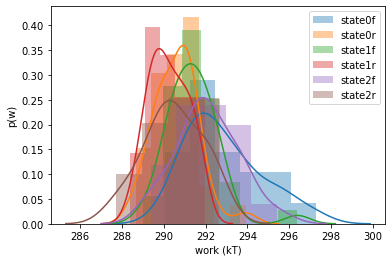

In [53]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

        
    # Plot work distributions
    for i in [0, 1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

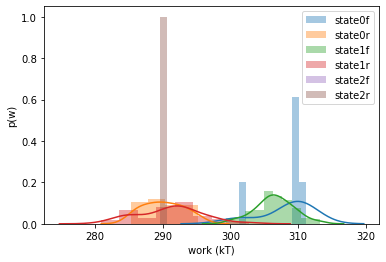

In [54]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [80]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(energy) # Change to exp(-energy*-1)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['apo'] - d_dgs_phase['complex']

In [55]:
import tqdm
states_apo = [0, 1, 2]
states_complex = [0, 1]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:35<00:00, 104.66it/s]


In [56]:
dgs_state_all_T42A = dgs_state_all

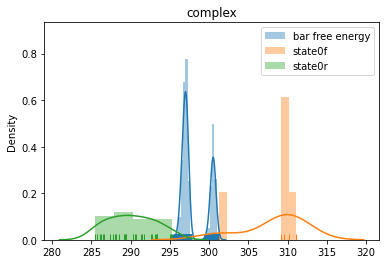

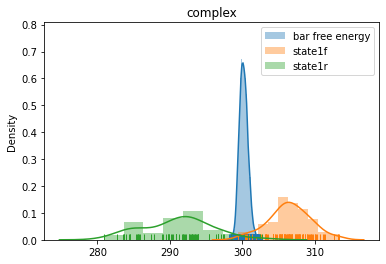

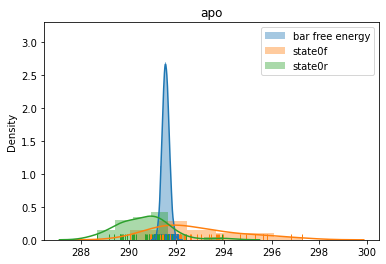

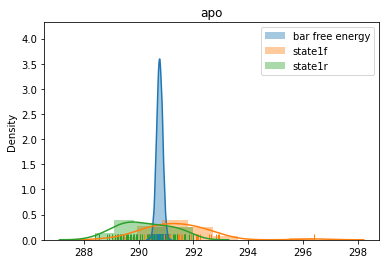

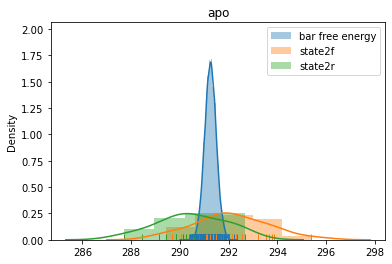

In [57]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

### Compare states A59R vs R59A

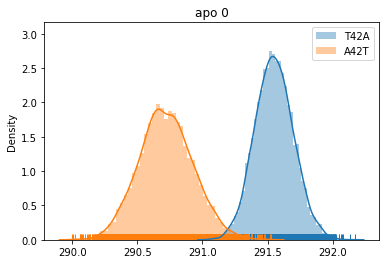

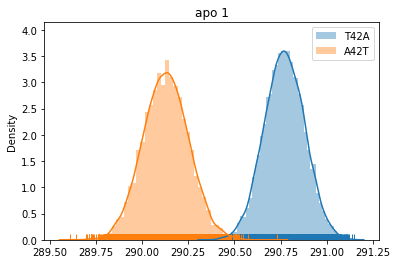

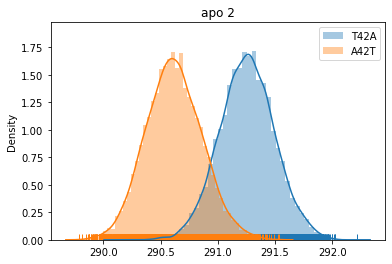

In [58]:
states = [0, 1, 2]
phases = ['apo']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

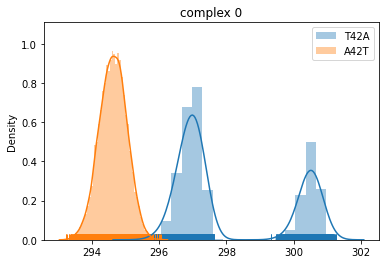

In [59]:
states = [0]
phases = ['complex']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

## Extract traj

### D39A complex reverse traj with work close to 160

In [1]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

In [21]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/72/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.npy"), "rb") as f:
    pos_reverse_old = np.load(f)
    

In [3]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [14]:
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])

In [15]:
htf._topology_proposal.old_topology.setPeriodicBoxVectors(box_vectors)

In [16]:
htf._topology_proposal.old_topology.getPeriodicBoxVectors()

Quantity(value=array([[6.7997, 0.    , 0.    ],
       [0.    , 6.7997, 0.    ],
       [0.    , 0.    , 6.7997]]), unit=nanometer)

In [22]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.old_topology, pos_reverse_old[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [23]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [24]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [25]:
traj = md.Trajectory(pos_reverse_old, md.Topology.from_openmm(htf._topology_proposal.old_topology))

In [26]:
traj

<mdtraj.Trajectory with 100 frames, 29474 atoms, 8989 residues, without unitcells at 0x2b65e9ee88d0>

In [27]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [28]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29474 atoms, 8989 residues, and unitcells at 0x2b65e9d78f50>

In [30]:
traj.save(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.pdb"))

### A39D complex forward traj with work close to 140

In [39]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

In [40]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.npy"), "rb") as f:
    pos_forward_new = np.load(f)
    

In [41]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [42]:
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])

In [43]:
htf._topology_proposal.old_topology.setPeriodicBoxVectors(box_vectors)

In [44]:
htf._topology_proposal.old_topology.getPeriodicBoxVectors()

Quantity(value=array([[6.7997, 0.    , 0.    ],
       [0.    , 6.7997, 0.    ],
       [0.    , 0.    , 6.7997]]), unit=nanometer)

In [45]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.new_topology, pos_forward_new[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [46]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [47]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [48]:
traj = md.Trajectory(pos_forward_new, md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [49]:
traj

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, without unitcells at 0x2b6652b8b8d0>

In [50]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [51]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, and unitcells at 0x2b65fc8ed150>

In [52]:
traj.save(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.pdb"))

# Grab indices of trajs in D39A complex reverse with works close to -160

In [2]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [3]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [4]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 72
for i in tqdm_notebook([72]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 72
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

In [5]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    

In [11]:
for i, work in enumerate(reverse_complex_accumulated):
    if abs(work) < 165 and abs(work) > 155:
        print(i, work)

48 -157.6725672722674
62 -159.49688095337464
72 -155.455073281715


# Grab indices of trajs in A39D complex forward with works far from -160

In [31]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib:(private) matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/zhangi/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.3.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases'

DEBUG:matplotlib:CACHEDIR=/home/zhangi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/zhangi/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [32]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [33]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 73
for i in tqdm_notebook([73]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 73
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

In [34]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    

In [38]:
for i, work in enumerate(forward_complex_accumulated):
    if abs(work) > 130:
        print(i, work)

11 -131.0036411382579
17 -133.59138746807292
33 -135.019367829651
36 -132.9313754151517
39 -134.07096241966784
40 -130.1146226969148
47 -134.48549176583415
48 -133.70815831053218
53 -131.8473938485725
79 -136.03946090010166
80 -136.47387534891928
82 -132.0389176488211
84 -131.93493631181718
91 -133.6036721861534
92 -132.05519750766948
